<a href="https://colab.research.google.com/github/gopalkalpande/20-Newsgroups/blob/master/20_Newsgroups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from sklearn.model_selection import train_test_split
from sklearn import model_selection

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/data/20 news group problem/"

20news-bydate-test  20news-bydate-train  test.csv  train.csv


In [0]:
df = pd.read_csv('/content/drive/My Drive/data/20 news group problem/train.csv')
df1 = pd.read_csv('/content/drive/My Drive/data/20 news group problem/test.csv')


In [0]:
df.isna().any()

News         False
NewsGroup    False
dtype: bool

In [0]:
df1.isna().any()

News         False
NewsGroup    False
dtype: bool

In [0]:
df.shape, df1.shape

((11314, 2), (7532, 2))

In [0]:
len(df.News[0])

11891

In [0]:
news = df.News.values[0]
group = df.NewsGroup.values[0]
print(group)
print(news)

alt.atheism
From: mathew <mathew@mantis.co.uk>
Subject: Alt.Atheism FAQ: Atheist Resources
Summary: Books, addresses, music -- anything related to atheism
Keywords: FAQ, atheism, books, music, fiction, addresses, contacts
Expires: Thu, 29 Apr 1993 11:57:19 GMT
Distribution: world
Organization: Mantis Consultants, Cambridge. UK.
Supersedes: <19930301143317@mantis.co.uk>
Lines: 290

Archive-name: atheism/resources
Alt-atheism-archive-name: resources
Last-modified: 11 December 1992
Version: 1.0

                              Atheist Resources

                      Addresses of Atheist Organizations

                                     USA

FREEDOM FROM RELIGION FOUNDATION

Darwin fish bumper stickers and assorted other atheist paraphernalia are
available from the Freedom From Religion Foundation in the US.

Write to:  FFRF, P.O. Box 750, Madison, WI 53701.
Telephone: (608) 256-8900

EVOLUTION DESIGNS

Evolution Designs sell the "Darwin fish".  It's a fish symbol, like the ones
Christian

In [0]:
news = df.News.values[5000]
group = df.NewsGroup.values[5000]
print(group)
print(news)

rec.motorcycles
From: revco@sfsuvax1.sfsu.edu (John Boockholdt)
Subject: Re: Lane Sharing in CA
Organization: California State University, Sacramento
Lines: 11

In three years of riding in the cities of San Jose,
Santa Clara, and Sunnyvale I never came into any
conflict with the local police over my lane splitting
habits (all three of these cities were listed earlier
as being anti-splitting in one way or another).  I
can't say whether this was due to luck, police
kindness, or there not actually being any ordinances
against it in these cities, so I continue.....

RevCo




In [0]:
news = df.News.values[10000]
group = df.NewsGroup.values[10000]
print(group)
print(news)

talk.politics.mideast
From: dbd@urartu.sdpa.org (David Davidian)
Subject: Turkish Government Agents on UseNet Lie Through Their Teeth!
Article-I.D.: urartu.1993Apr15.204512.11971
Organization: S.D.P.A. Center for Regional Studies
Lines: 63

In revision of history <9304131827@zuma.UUCP> as posted by Turkish Government
Agents under the guise of sera@zuma.UUCP (Serdar Argic) LIE in response to
article <1993Apr13.033213.4148@urartu.sdpa.org> hla@urartu.sdpa.org and
scribed: 

[(*]    Orhan Gunduz is blown up. Gunduz receives an ultimatum: Either 
[(*]    he gives up his honorary position or he will be "executed". He 
[(*]    refuses. "Responsibility" is claimed by JCAG and SDPA.

[(*]    May 4, 1982 - Cambridge, Massachusetts
[(*]	Orhan Gunduz, the Turkish honorary consul in Boston, would not bow 
[(*]	to the Armenian terrorist ultimatum that he give up his title of 
[(*]	"honorary consul". Now he is attacked and murdered in cold blood.
[(*]	President Reagan orders an all-out manhunt-to no

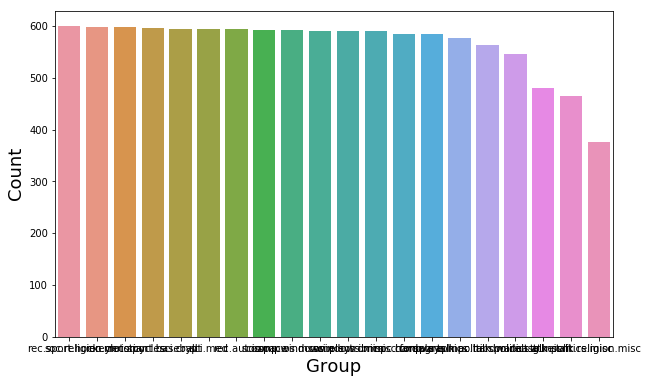

In [0]:
data_per_group = df.NewsGroup.value_counts()
plt.figure(figsize=(10,6))
sns.barplot(data_per_group.index, data_per_group.values)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Group', fontsize=18);

In [0]:
print(data_per_group)

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
sci.med                     594
rec.autos                   594
sci.space                   593
comp.windows.x              593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: NewsGroup, dtype: int64


In [0]:
import re

def decontracted(phrase):
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [0]:
from tqdm import tqdm
from bs4 import BeautifulSoup
preprocessed_news = []
# tqdm is for printing the status bar
for news in tqdm(df.News):
    news = re.sub('<.*?>', '', news)
    news = re.sub(r"http\S+", "", news)
    news = BeautifulSoup(news, 'lxml').get_text()
    news = decontracted(news)
    news = re.sub("\S*\d\S*", "", news).strip()
    news = re.sub('[^A-Za-z]+', ' ', news)
    # https://gist.github.com/sebleier/554280
    news = ' '.join(e.lower() for e in news.split() if e.lower() not in stopwords)
    preprocessed_news.append(news.strip())

    
#print(preprocessed_reviews)

100%|██████████| 11314/11314 [00:06<00:00, 1630.13it/s]


In [0]:
preprocessed_news[555]

'mccool dgp toronto edu michael mccool subject apr toronto siggraph event organization university toronto dynamic graphics project distribution na lines toronto siggraph chance art graphics animation indigo ken evans imagicians artware inc tuesday april mcluhan centre culture technology university toronto queen park crescent toronto members non members alike non members encouraged become members abstract imagicians artware inc entering early beta site testing silicon graphics workstations new abstract artwork animation package called chance art package described demonstrated technical issues discussed marketing plans outlined talk also present technical business problems increasingly confronting small startup software companies today opportunities situation presents time event allocated hands demonstrations interested parties silicon graphics graciously providing indigo event myck kupka also demonstrating computerized interactive reflective stereoscope installed upstairs mcluhan centre

In [0]:
from tqdm import tqdm
from bs4 import BeautifulSoup
preprocessed_news_test = []
# tqdm is for printing the status bar
for news in tqdm(df1.News):
    news = re.sub('<.*?>', '', news)
    news = re.sub(r"http\S+", "", news)
    news = BeautifulSoup(news, 'lxml').get_text()
    news = decontracted(news)
    news = re.sub("\S*\d\S*", "", news).strip()
    news = re.sub('[^A-Za-z]+', ' ', news)
    # https://gist.github.com/sebleier/554280
    news = ' '.join(e.lower() for e in news.split() if e.lower() not in stopwords)
    preprocessed_news_test.append(news.strip())

    
#print(preprocessed_reviews)

100%|██████████| 7532/7532 [00:04<00:00, 1685.75it/s]


In [0]:
preprocessed_news_test[0]

'nanci ann miller subject amusing atheists agnostics organization sponsored account school computer science carnegie mellon pittsburgh pa lines nntp posting host reply timmbake mcl ucsb edu bake timmons writes lies hypocrisy dude atheism takes much faith theism admit people might think takes faith atheist faith take kind faith say great invisible pink unicorn not exist take kind faith say santa claus not exist may people suppose certainly not big leap faith say things god exist suppose depends notion definition faith besides not believing god means one not deal extra baggage comes leaves person feeling wonderfully free especially beaten head years agree religion belief often important psychological healer many people reason think important however trying force psychological fantasy not mean bad way really someone else not interested extremely rude still believed santa claus said belief santa wonderful things life making better person allowing live without guilt etc tried get believe sa

In [0]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
tf_idf_vect.fit(preprocessed_news)
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])

some sample features(unique words in the corpus) ['aa', 'aaa', 'aardvark', 'aardvark ucs', 'aaron', 'aaron arc', 'aaron lung', 'aaron ray', 'aau', 'aau dk']


In [0]:
final_tf_idf = tf_idf_vect.transform(preprocessed_news)
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (11314, 25781)
the number of unique words including both unigrams and bigrams  25781


In [0]:
joblib.dump(final_tf_idf, '/content/drive/My Drive/data/20 news group problem/train_tf_idf.joblib')

['/content/drive/My Drive/data/20 news group problem/train_tf_idf.joblib']

In [0]:
final_tf_idf_test = tf_idf_vect.transform(preprocessed_news_test)
print("the type of count vectorizer ",type(final_tf_idf_test))
print("the shape of out text TFIDF vectorizer ",final_tf_idf_test.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf_test.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (7532, 25781)
the number of unique words including both unigrams and bigrams  25781


In [0]:
joblib.dump(final_tf_idf_test, '/content/drive/My Drive/data/20 news group problem/test_tf_idf.joblib')

['/content/drive/My Drive/data/20 news group problem/test_tf_idf.joblib']

In [0]:
y_train = df.NewsGroup
y_test = df1.NewsGroup

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [0]:
y_test

array([ 0,  0,  0, ..., 19, 19, 19])

In [0]:
from xgboost import XGBClassifier
classifier = XGBClassifier( n_jobs=-1, n_estimators=200)
classifier.fit(final_tf_idf, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=-1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [0]:
import pickle
pickle.dump(classifier, open("/content/drive/My Drive/data/20 news group problem/xgb_clf.pickle.dat", "wb"))


# load model from file
#loaded_model = pickle.load(open("pima.pickle.dat", "rb"))
# make predictions for test data
#y_pred = loaded_model.predict(X_test)

In [0]:
y_pred_xgb = classifier.predict(final_tf_idf_test)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70       319
           1       0.62      0.67      0.64       389
           2       0.71      0.73      0.72       394
           3       0.60      0.71      0.65       392
           4       0.75      0.78      0.76       385
           5       0.77      0.68      0.72       395
           6       0.80      0.84      0.82       390
           7       0.87      0.77      0.82       396
           8       0.89      0.84      0.87       398
           9       0.88      0.86      0.87       397
          10       0.91      0.90      0.91       399
          11       0.92      0.83      0.87       396
          12       0.50      0.64      0.56       393
          13       0.84      0.79      0.81       396
          14       0.85      0.86      0.85       394
          15       0.77      0.87      0.82       398
          16       0.65      0.80      0.72       364
          17       0.96    